In [ ]:
!pip install tensorflow


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [23]:
import zipfile
import os

# List of zip files
zip_files = ['/content/Tiger.zip', '/content/Elephants.zip', '/content/Crocodile.zip', '/content/Cheetah.zip']

# Create directory for dataset
os.makedirs('dataset', exist_ok=True)

# Extract each zip file
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('dataset')


In [24]:
!ls dataset


Cheetah  Crocodile  Elephants  Tiger


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Set data directory path
data_dir = 'dataset'  # This should contain subdirectories for each class

# Load data
data = image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256))


Found 1658 files belonging to 4 classes.


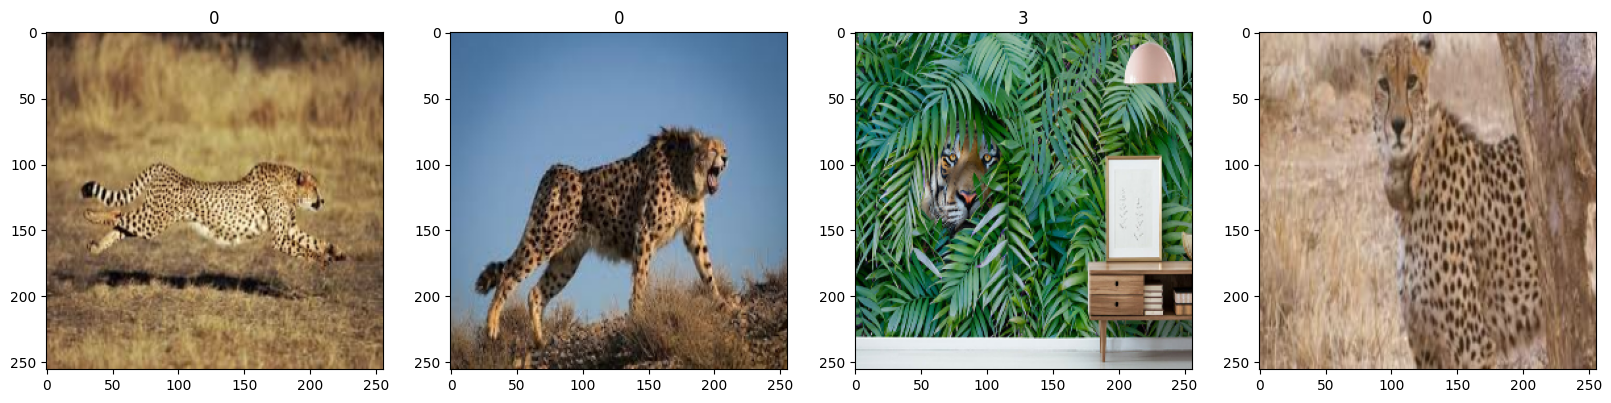

In [26]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()


In [27]:
data = data.map(lambda x, y: (x / 255.0, y))


In [28]:
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data.take(train_size)
test_data = data.skip(train_size)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
model.fit(train_data, epochs=10)


Epoch 1/10
41/41 [==============================] - 198s 5s/step - loss: 1.6840 - accuracy: 0.3003
Epoch 2/10
41/41 [==============================] - 197s 5s/step - loss: 1.3247 - accuracy: 0.3765
Epoch 3/10
41/41 [==============================] - 204s 5s/step - loss: 1.2524 - accuracy: 0.4184
Epoch 4/10
41/41 [==============================] - 195s 5s/step - loss: 1.1087 - accuracy: 0.5259
Epoch 5/10
41/41 [==============================] - 194s 5s/step - loss: 0.8762 - accuracy: 0.6517
Epoch 6/10
41/41 [==============================] - 200s 5s/step - loss: 0.7011 - accuracy: 0.7188
Epoch 7/10
41/41 [==============================] - 193s 5s/step - loss: 0.5243 - accuracy: 0.8079
Epoch 8/10
41/41 [==============================] - 197s 5s/step - loss: 0.4207 - accuracy: 0.8453
Epoch 9/10
41/41 [==============================] - 191s 5s/step - loss: 0.3079 - accuracy: 0.8834
Epoch 10/10
41/41 [==============================] - 203s 5s/step - loss: 0.2675 - accuracy: 0.9101


In [31]:
loss, accuracy = model.evaluate(test_data)

if accuracy >= 0.85:
    print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
    print(f"Try again, not enough accuracy! Your accuracy is {accuracy}")


11/11 [==============================] - 25s 1s/step - loss: 0.4287 - accuracy: 0.8613
Congratulations, CNN assignment complete!! Your accuracy is 0.8612716794013977
